In [1]:
%pylab inline
import sklearn

Populating the interactive namespace from numpy and matplotlib


# Making Sense of Data ...


For this notebook you need to have the `scikit-learn` (http://scikit-learn.org/stable/index.html) module installed, which is part of a normal Anaconda installation.

# Feature Spaces

## One-dimensional Features Space 

<IPython.core.display.Javascript object>


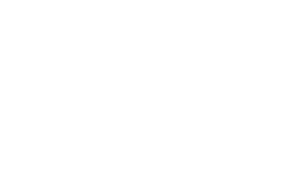

In [2]:
%matplotlib notebook
import numpy as np
from sklearn.datasets.samples_generator import make_blobs


centers = [[60], [120], [170], [240]]
data, _ = make_blobs(n_samples=400, n_features=1, cluster_std=4, centers=centers)

data_1d = np.rint(data).astype(np.uint8)
plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

y = np.zeros(np.shape(data))
plt.plot(data_1d , y, 'b|', ms=50)
plt.axis('off')
plt.show()

## Two-dimensional Features Space 

<IPython.core.display.Javascript object>


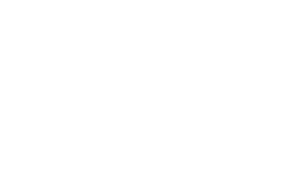

In [3]:
%matplotlib notebook
from sklearn.datasets.samples_generator import make_blobs

centers = [[2, 1], [0, 0], [1, -1]]
data_2d, _ = make_blobs(n_samples=2500, centers=centers, 
                        cluster_std=0.1)

plt.plot(data_2d[:,0], data_2d[:,1], 'b.')

plt.title('Estimated number of clusters:')
plt.show()

## Three-dimensional Features Space 

<IPython.core.display.Javascript object>


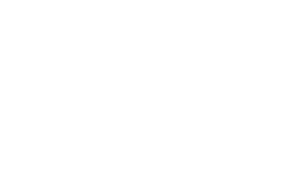

In [4]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs


centers = [[2, 1, 0], [0, -1, -1], [1, -1, 3]]
data_3d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)
x, y, z = data_3d[:,0], data_3d[:,1], data_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidth=0.2)

plt.show()

## Feature vectors as descriptions of things

Let's say we have a Person class:

```python

class Person:
    
    def __init__(self, age, height):
        self.age = age
        self.height = height
```

A Person is described by two **features**: `age` and `height`

* So a **feature vector** for a person would have 2 dimensions
  * $x^1 = $ age
  * $x^2 = $ height

## Feature vectors in high dimensions

* Imagine an image with the resolution `1024 x 800`
  * How many pixels does that image have?

* That image has `1024 * 800 = 819200` features!
```python
x[0]      # First feature
x[819199] # Last feature
```

## Motivating the problem

“We need to be able to predict whether a particular
customer will stay with us. Here are the logs of customers’ interactions with our product for
five years.”

What information can we get from a log?

* Timestamp
* Number of connections
* Frequency of connections
* Session duration
* ...?

The more precisely we can describe the data, the better our model gets!

We want to select the information that is important and *remove* the ones that aren't.

## Feature engineering

The problem of transforming raw data into a dataset is called feature engineering.

Goal: describe data with *informative* features

Today: techniques to encode data in specific ways

* One-hot
* Binning
* Word embeddings
* Normalisation
* Standardisation
* Dealing with missing features

## One-hot encoding

Imagine $n$ features. One-hot encoding means setting **one** feature to 1 and the rest to 0.

Example:
 * Features `[Left, Right]`: `[1, 0]`
 * Features `[M, T, W, T, F, S, S]`: `[0, 0, 1, 0, 0, 0]`
 * Features `[M, F, X]`: `[0, 1, 0]`

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs = [['Male'], ['Female'], ['Female']]
encoder.fit_transform(xs).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.]])

In [6]:
encoder.fit_transform(xs).todense()

matrix([[0., 1.],
        [1., 0.],
        [1., 0.]])

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs = [['Male', 1], ['Female', 3], ['Female', 2]]
encoder.fit_transform(xs).todense()

matrix([[0., 1., 1., 0., 0.],
        [1., 0., 0., 0., 1.],
        [1., 0., 0., 1., 0.]])

## Word embeddings

How do we represent words?

Can we make them into feature vectors?

Yes, yes we can!

![](images/word-embeddings.png)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
vectorizer.fit_transform(corpus).todense()

matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [9]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [10]:
print(X.toarray())

NameError: name 'X' is not defined

## Exercise

* Use the `CountVectorizer` from `sklearn.feature_extraction` to read the book `data/moby_dick.txt`
  * How many times does the word 'wood' appear?
* Use the `load_digits` function from the `sklearn.datasets` package to load a `sklearn` dataset
  * The package contains `.data` of 8x8 images. Extract the first image in an 8x8 array
  * Use the `plt.imshow` function to plot the image

# How do we find clusters?

Humans are quite good in quickly finding clusters when looking at the data visualizations above. The problem is, how to make a machine find clusters.

http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

Number of estimated clusters : 4


<IPython.core.display.Javascript object>


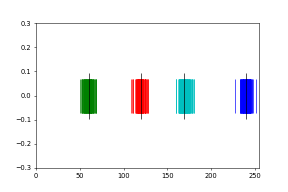

In [12]:
%matplotlib notebook
from itertools import cycle

labels, cluster_centers, n_clusters = mean_shift(data_1d)

plt.cla()
plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x = data_1d[my_members, 0]
    y = np.zeros(np.shape(x))

    plt.plot(x , y, col + '|', ms=50)
    plt.plot(cluster_center[0] , 0, 'k|', ms=70)

plt.show()

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


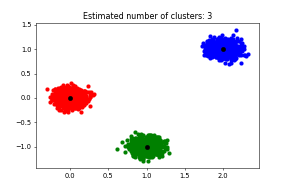

In [13]:
%matplotlib notebook
from itertools import cycle


labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

Number of estimated clusters : 3


<IPython.core.display.Javascript object>


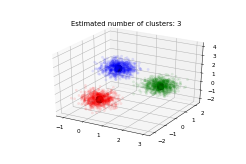

In [14]:
%matplotlib notebook
from itertools import cycle


labels, cluster_centers, n_clusters = mean_shift(data_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = data_3d[my_members,0], data_3d[my_members,1], data_3d[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

In [15]:
import pandas as pd


filename = './iris_data.csv'
df = pd.read_csv(filename)
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa
5,5.4,3.9,1.7,0.4,I. setosa
6,4.6,3.4,1.4,0.3,I. setosa
7,5.0,3.4,1.5,0.2,I. setosa
8,4.4,2.9,1.4,0.2,I. setosa
9,4.9,3.1,1.5,0.1,I. setosa


<IPython.core.display.Javascript object>


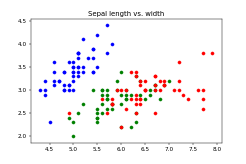

I. setosa b
I. versicolor g
I. virginica r


In [16]:
labels = np.unique(df['Species'])

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for label, col in zip(labels, colors):
    print(label, col)
    x = df[df['Species'] == label]['Sepal length']
    y = df[df['Species'] == label]['Sepal width']

    ax.scatter(x, y, c=col,  linewidth=0.2)
    
plt.title('Sepal length vs. width')
plt.show()

Number of estimated clusters : 3


/home/jens/.virtualenvs/slides/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


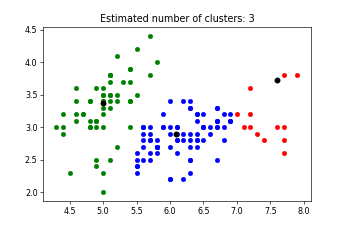

In [17]:
data_2d = df[['Sepal length', 'Sepal width']].as_matrix()
labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col,  linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

# How does this work?

  * http://stackoverflow.com/a/17912660
  * http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/
  * https://en.wikipedia.org/wiki/Mean_shift
  * https://github.com/mattnedrich/MeanShift_py

```bash
git clone https://github.com/mattnedrich/MeanShift_py.git
```

The following is the entry from Stackoverflow http://stackoverflow.com/a/17912660 explaining the mean shift algorithm. It is copied here for convinience and readability.


### The image data is converted into feature space
![](https://i.stack.imgur.com/80Uaa.jpg)
In case of a gray-scale image, all you have are intensity values, so feature space will only be one-dimensional. (You might compute some texture features, for instance, and then your feature space would be two dimensional – and you would be segmenting based on intensity and texture)



### Search windows are distributed over the feature space 
![](https://i.stack.imgur.com/52HFX.jpg)
The number of windows, window size, and initial locations are arbitrary for this example – something that can be fine-tuned depending on specific applications


## Mean-Shift iterations:

### 1.) The MEANs of the data samples within each window are computed 
![](https://i.stack.imgur.com/JaOo5.jpg)



### 2.) The windows are SHIFTed to the locations equal to their previously computed means 
![](https://i.stack.imgur.com/7Nk75.jpg)


### Steps 1.) and 2.) are repeated until convergence, i.e. all windows have settled on final locations 
![](https://i.stack.imgur.com/5127k.jpg)


### The windows that end up on the same locations are merged 
![](https://i.stack.imgur.com/SryA8.jpg)


### The data is clustered according to the window traversals 
![](https://i.stack.imgur.com/A871k.jpg)

That is, all data that was traversed by windows that ended up at, say, location "2", will form a cluster associated with that location.

So, this segmentation will (coincidentally) produce three groups. Choosing different window sizes and initial locations might produce different results.

# What else can I use this for?

For example for image segmentation

In [ ]:
%matplotlib notebook
import os
import cv2
import webget

# url = 'https://github.com/opencv/opencv/raw/master/samples/data/rubberwhale2.png'
url = 'https://github.com/opencv/opencv/raw/master/samples/data/baboon.jpg'
# url = 'https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg'
webget.download(url)

img = cv2.imread(os.path.basename(url))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

plt.imshow(img, interpolation='none')

In [ ]:
lab_image = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
img = cv2.medianBlur(lab_image, 5)
    
img_lst = img.reshape((img.shape[0] * img.shape[1], 3))
img_lst_orig = np.copy(img_lst)

labels, cluster_centers, n_clusters = mean_shift(img_lst)

label_img = labels.reshape(height, width)
for l in range(n_clusters):
    img[label_img == l] = cluster_centers[l]

rgb_segments = cv2.cvtColor(img, cv2.COLOR_Lab2RGB)
plt.imshow(rgb_segments, interpolation='none')

In [ ]:
from itertools import cycle

labels, cluster_centers, n_clusters = mean_shift(img_lst_orig)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('cmybgr')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = img_lst_orig[my_members,0], img_lst_orig[my_members,1], img_lst_orig[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

In [ ]:
print(cluster_centers)